In [1]:
!pip install -qqq git+https://github.com/albumentations-team/albumentations.git
!pip install -qqq torchsummary
!pip install -qqq torch-lr-finder

  Preparing metadata (setup.py) ... done


In [2]:
!git clone https://github.com/amitkml/ERA-V1

Cloning into 'ERA-V1'...
remote: Enumerating objects: 291, done.
remote: Counting objects: 100% (265/265), done.
remote: Compressing objects: 100% (207/207), done.
remote: Total 291 (delta 98), reused 213 (delta 51), pack-reused 26
Receiving objects: 100% (291/291), 91.12 MiB | 27.83 MiB/s, done.
Resolving deltas: 100% (99/99), done.
Updating files: 100% (152/152), done.


In [3]:
cd /content/ERA-V1/Session11

/content/ERA-V1/Session11


In [4]:
from utils.helper import seed_everything, get_default_device, calculate_mean_std
seed_everything(1)

In [5]:
mean, std = calculate_mean_std("CIFAR10")
mean, std

100%|██████████| 170498071/170498071 [00:05<00:00, 28837434.70it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


(array([0.49139968, 0.48215841, 0.44653091]),
 array([0.24703223, 0.24348513, 0.26158784]))

In [6]:
from utils.transforms import apply_transforms_custom_resnet
train_transforms, test_transforms = apply_transforms_custom_resnet(mean, std)

In [7]:
from torchvision import datasets

train_dataset = datasets.CIFAR10(root='data/', train=True, download=False, transform=train_transforms)
test_dataset = datasets.CIFAR10(root='data/', train=False, download=False, transform=test_transforms)

In [8]:
from torch.utils.data import DataLoader

train_loader = DataLoader(dataset=train_dataset, batch_size=128, shuffle=True, pin_memory=True, num_workers=2)
test_loader = DataLoader(dataset=test_dataset, batch_size=128, shuffle=False, pin_memory=True, num_workers=2)

In [9]:
labels = train_dataset.classes
labels

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

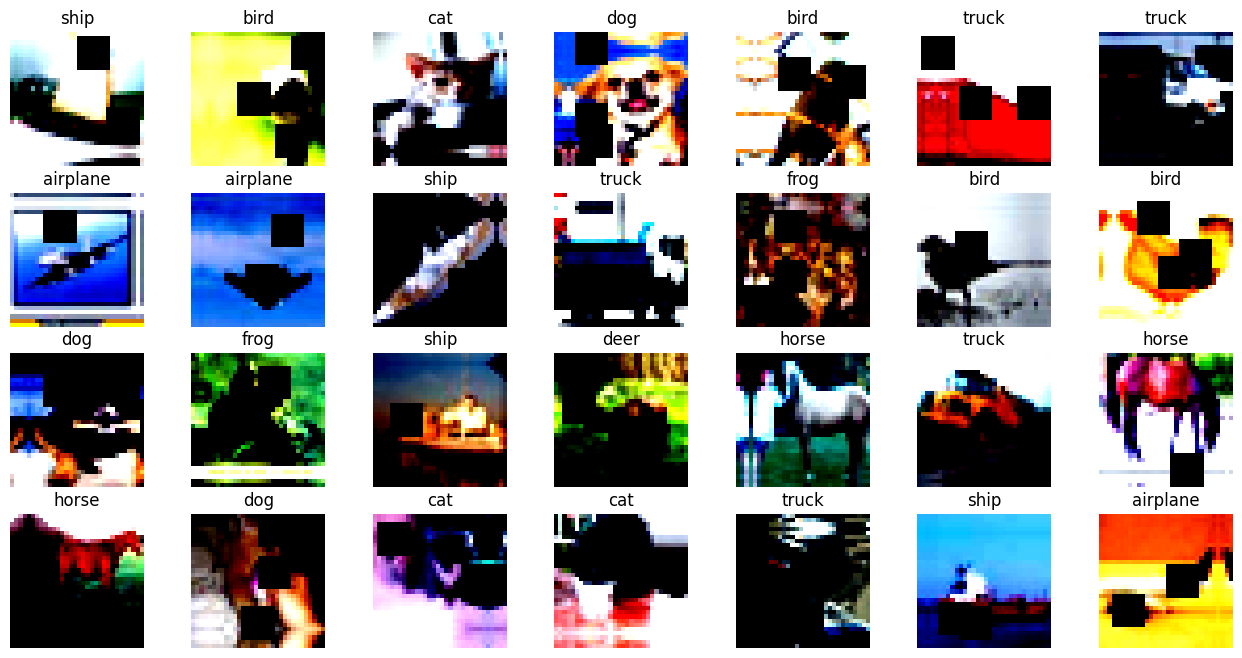

In [ ]:
from utils.plot_utils import show_batch

show_batch(train_loader, labels)

In [10]:
device = get_default_device()
device

device(type='cuda')

In [11]:
from models.custom_resnet import CustomResNet
from  models.resnet import ResNet

from utils.helper import model_summary

model = CustomResNet("BN").to(device)
# model = ResNet().to(device) #.to(device)


model_summary(model, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [28]:
print(model)

CustomResNetClass(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (shortcut): Sequential()
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0

In [12]:
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim

epochs = 24
lr = 0.001
l1_factor = 0
max_epoch = 5

optimizer = optim.SGD(model.parameters(), lr=lr,momentum=0.9, weight_decay = 0.005)
criterion = nn.CrossEntropyLoss()

/usr/local/lib/python3.10/dist-packages/torch_lr_finder/lr_finder.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


  0%|          | 0/1896 [00:00<?, ?it/s]

Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 3.70E-01


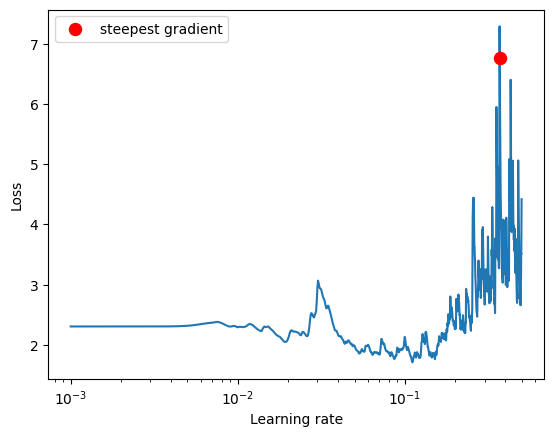

In [ ]:
from utils.lr_finder import find_lr

max_lr = find_lr(model, train_loader, test_loader, epochs, optimizer, criterion, device)

In [13]:
max_lr

In [14]:
from main import trainer

train_accuracy, train_losses, test_accuracy, test_losses = trainer(model, epochs, device, train_loader, test_loader, optimizer, criterion, l1_factor, max_lr, max_epoch)

Epoch 1:


Train Loss=1.607972502708435 Batch_id=390 LR= 0.07723 Train Accuracy= 34.78: 100%|██████████| 391/391 [00:48<00:00,  8.09it/s]



: Average Test loss: 0.0144, Test Accuracy: 3780/10000 (37.80%)

Epoch 2:


Train Loss=1.643822431564331 Batch_id=390 LR= 0.15828 Train Accuracy= 45.23: 100%|██████████| 391/391 [00:47<00:00,  8.19it/s]



: Average Test loss: 0.0138, Test Accuracy: 3676/10000 (36.76%)

Epoch 3:


Train Loss=1.5373058319091797 Batch_id=390 LR= 0.25842 Train Accuracy= 45.22: 100%|██████████| 391/391 [00:48<00:00,  8.12it/s]



: Average Test loss: 0.0174, Test Accuracy: 2312/10000 (23.12%)

Epoch 4:


Train Loss=1.5534660816192627 Batch_id=390 LR= 0.33937 Train Accuracy= 42.67: 100%|██████████| 391/391 [00:48<00:00,  8.12it/s]



: Average Test loss: 0.0283, Test Accuracy: 1908/10000 (19.08%)

Epoch 5:


Train Loss=1.6580712795257568 Batch_id=390 LR= 0.37018 Train Accuracy= 40.94: 100%|██████████| 391/391 [00:48<00:00,  8.10it/s]



: Average Test loss: 0.0592, Test Accuracy: 1692/10000 (16.92%)

Epoch 6:


Train Loss=1.5636427402496338 Batch_id=390 LR= 0.36764 Train Accuracy= 41.62: 100%|██████████| 391/391 [00:48<00:00,  8.10it/s]



: Average Test loss: 0.0129, Test Accuracy: 4096/10000 (40.96%)

Epoch 7:


Train Loss=1.5576112270355225 Batch_id=390 LR= 0.36013 Train Accuracy= 40.98: 100%|██████████| 391/391 [00:48<00:00,  8.09it/s]



: Average Test loss: 0.0195, Test Accuracy: 2242/10000 (22.42%)

Epoch 8:


Train Loss=1.7311140298843384 Batch_id=390 LR= 0.34784 Train Accuracy= 40.80: 100%|██████████| 391/391 [00:48<00:00,  8.06it/s]



: Average Test loss: 0.0166, Test Accuracy: 3303/10000 (33.03%)

Epoch 9:


Train Loss=1.4983235597610474 Batch_id=390 LR= 0.33111 Train Accuracy= 41.13: 100%|██████████| 391/391 [00:48<00:00,  8.09it/s]



: Average Test loss: 0.0173, Test Accuracy: 2948/10000 (29.48%)

Epoch 10:


Train Loss=1.6393623352050781 Batch_id=390 LR= 0.31039 Train Accuracy= 41.45: 100%|██████████| 391/391 [00:48<00:00,  8.11it/s]



: Average Test loss: 0.0776, Test Accuracy: 1102/10000 (11.02%)

Epoch 11:


Train Loss=1.7620398998260498 Batch_id=390 LR= 0.28626 Train Accuracy= 42.30: 100%|██████████| 391/391 [00:48<00:00,  8.13it/s]



: Average Test loss: 0.0204, Test Accuracy: 2356/10000 (23.56%)

Epoch 12:


Train Loss=1.7625335454940796 Batch_id=390 LR= 0.25937 Train Accuracy= 41.89: 100%|██████████| 391/391 [00:48<00:00,  8.12it/s]



: Average Test loss: 0.0261, Test Accuracy: 1738/10000 (17.38%)

Epoch 13:


Train Loss=1.6461549997329712 Batch_id=390 LR= 0.23045 Train Accuracy= 42.55: 100%|██████████| 391/391 [00:48<00:00,  8.13it/s]



: Average Test loss: 0.0269, Test Accuracy: 1700/10000 (17.00%)

Epoch 14:


Train Loss=1.4357489347457886 Batch_id=390 LR= 0.20030 Train Accuracy= 43.81: 100%|██████████| 391/391 [00:47<00:00,  8.16it/s]



: Average Test loss: 0.0161, Test Accuracy: 3447/10000 (34.47%)

Epoch 15:


Train Loss=1.586640477180481 Batch_id=390 LR= 0.16973 Train Accuracy= 44.37: 100%|██████████| 391/391 [00:47<00:00,  8.19it/s]



: Average Test loss: 0.0321, Test Accuracy: 1542/10000 (15.42%)

Epoch 16:


Train Loss=1.7428001165390015 Batch_id=390 LR= 0.13958 Train Accuracy= 45.03: 100%|██████████| 391/391 [00:48<00:00,  8.12it/s]



: Average Test loss: 0.0179, Test Accuracy: 2718/10000 (27.18%)

Epoch 17:


Train Loss=1.5141000747680664 Batch_id=390 LR= 0.11067 Train Accuracy= 46.43: 100%|██████████| 391/391 [00:48<00:00,  8.13it/s]



: Average Test loss: 0.0154, Test Accuracy: 3257/10000 (32.57%)

Epoch 18:


Train Loss=1.3022955656051636 Batch_id=390 LR= 0.08379 Train Accuracy= 48.42: 100%|██████████| 391/391 [00:47<00:00,  8.18it/s]



: Average Test loss: 0.0396, Test Accuracy: 1050/10000 (10.50%)

Epoch 19:


Train Loss=1.2265230417251587 Batch_id=390 LR= 0.05968 Train Accuracy= 50.23: 100%|██████████| 391/391 [00:47<00:00,  8.17it/s]



: Average Test loss: 0.0155, Test Accuracy: 3185/10000 (31.85%)

Epoch 20:


Train Loss=1.3847253322601318 Batch_id=390 LR= 0.03898 Train Accuracy= 52.05: 100%|██████████| 391/391 [00:47<00:00,  8.16it/s]



: Average Test loss: 0.0123, Test Accuracy: 4640/10000 (46.40%)

Epoch 21:


Train Loss=0.979001522064209 Batch_id=390 LR= 0.02228 Train Accuracy= 56.06: 100%|██████████| 391/391 [00:47<00:00,  8.21it/s]



: Average Test loss: 0.0099, Test Accuracy: 5533/10000 (55.33%)

Epoch 22:


Train Loss=0.9340547323226929 Batch_id=390 LR= 0.01001 Train Accuracy= 60.31: 100%|██████████| 391/391 [00:47<00:00,  8.21it/s]



: Average Test loss: 0.0112, Test Accuracy: 5487/10000 (54.87%)

Epoch 23:


Train Loss=0.7898014187812805 Batch_id=390 LR= 0.00252 Train Accuracy= 65.77: 100%|██████████| 391/391 [00:47<00:00,  8.18it/s]



: Average Test loss: 0.0062, Test Accuracy: 7269/10000 (72.69%)

Epoch 24:


Train Loss=0.8325597643852234 Batch_id=390 LR= 0.00000 Train Accuracy= 70.47: 100%|██████████| 391/391 [00:47<00:00,  8.18it/s]



: Average Test loss: 0.0055, Test Accuracy: 7536/10000 (75.36%)



Total wrong predictions are 2464


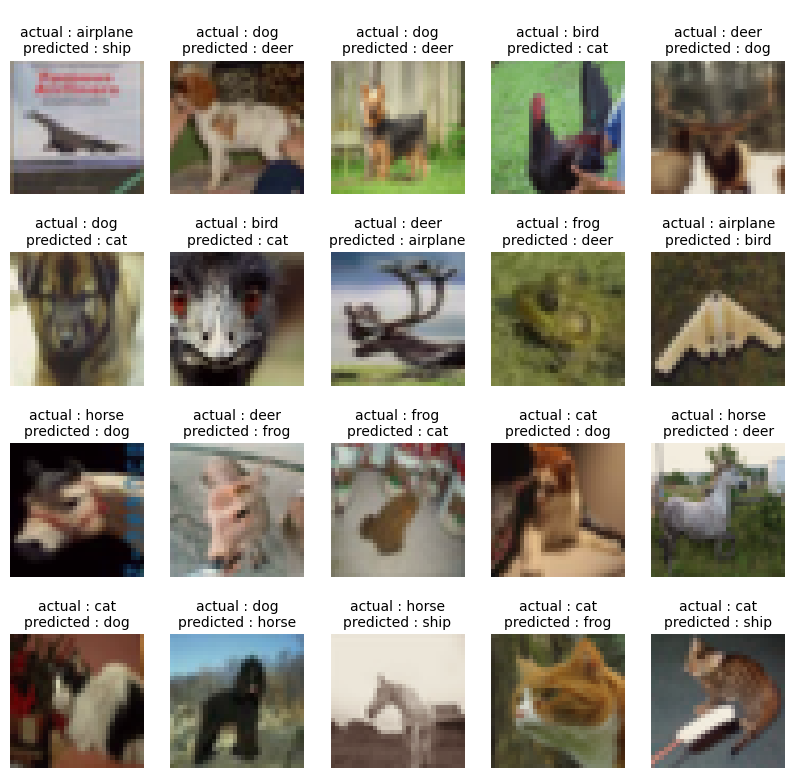

In [17]:
from utils.plot_utils import misclassified_images

images_misclassified = misclassified_images(model, test_loader, device)

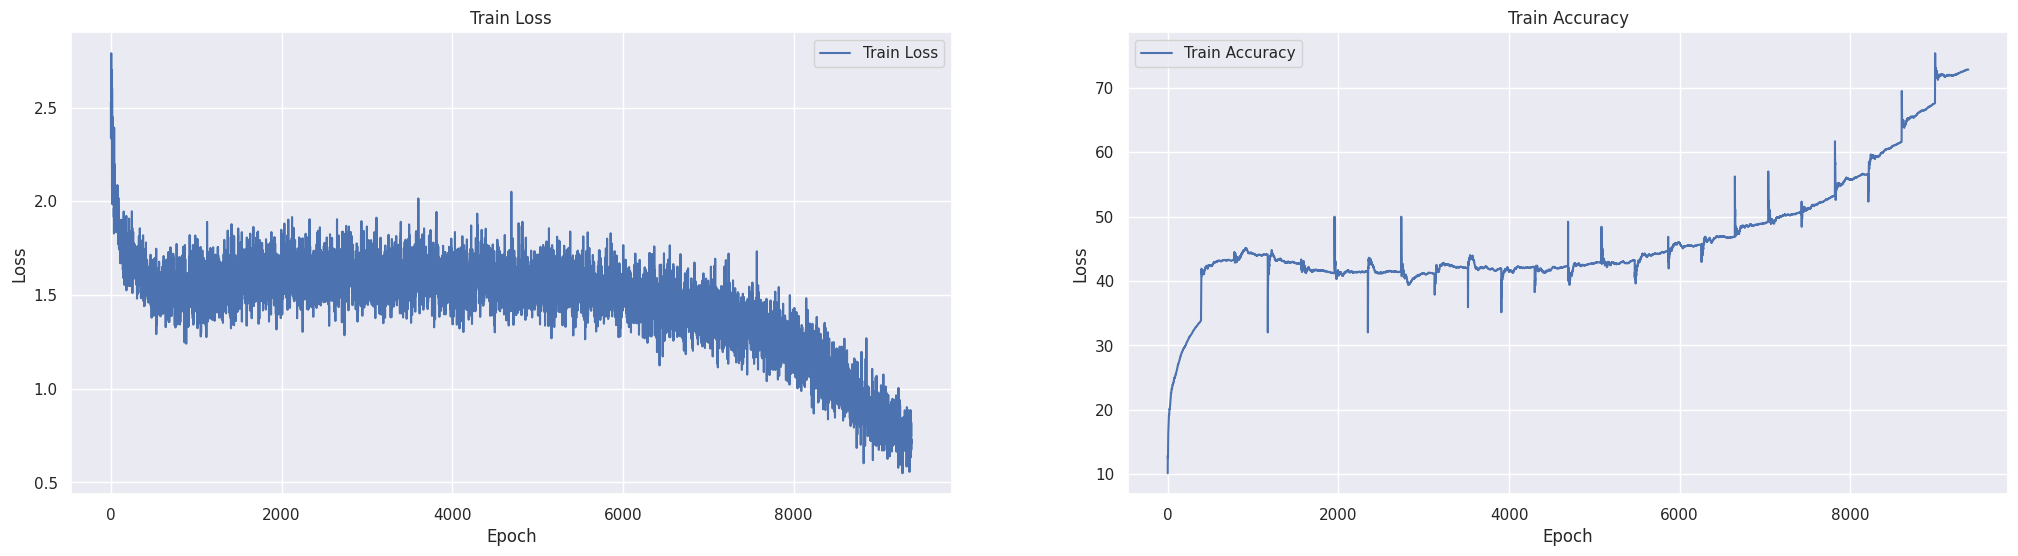

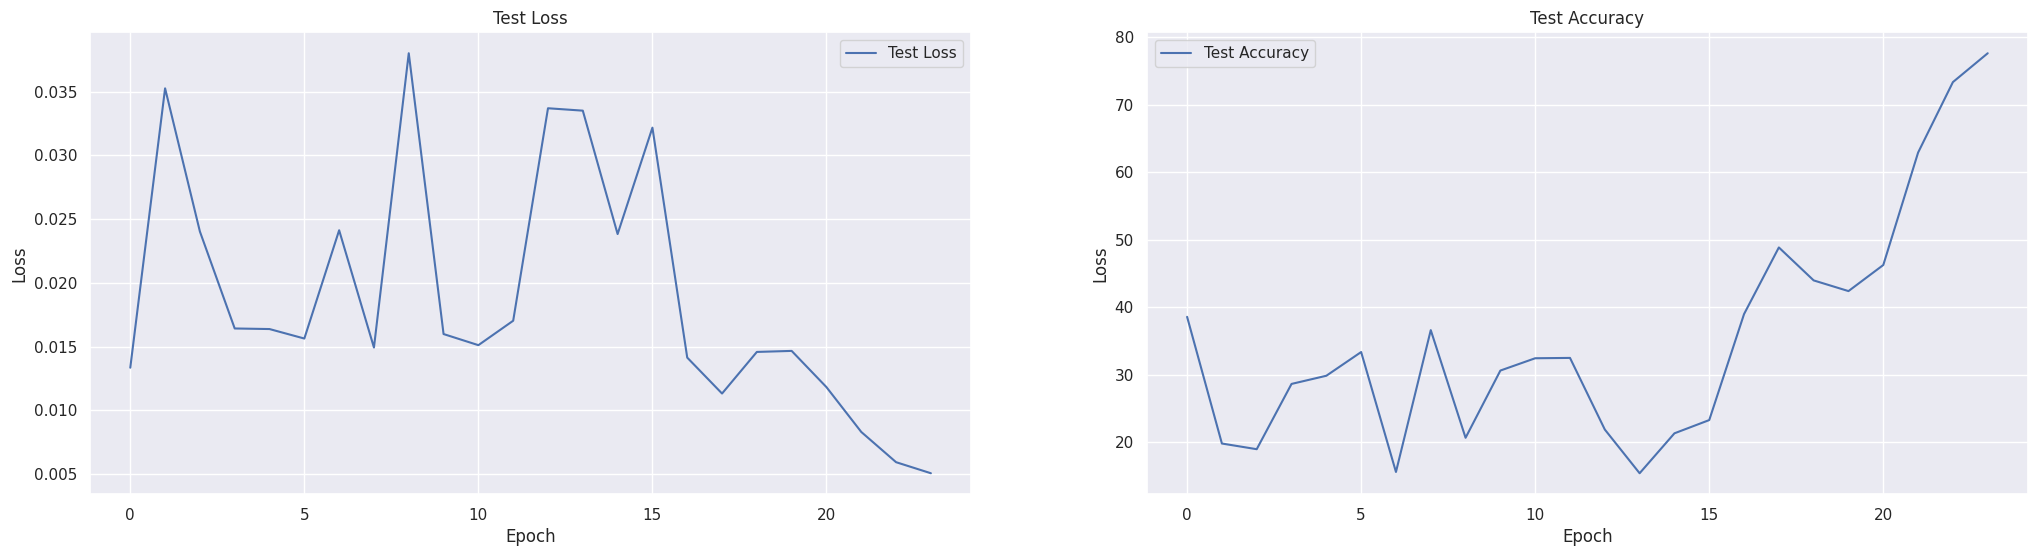

In [ ]:
from utils.plot_utils import plot_metrics

plot_metrics((train_accuracy, train_losses, test_accuracy, test_losses))

In [ ]:
from utils.helper import class_level_accuracy

class_level_accuracy(model, test_loader, device, labels)

Accuracy of airplane : 80 %
Accuracy of automobile : 92 %
Accuracy of  bird : 61 %
Accuracy of   cat : 59 %
Accuracy of  deer : 70 %
Accuracy of   dog : 67 %
Accuracy of  frog : 86 %
Accuracy of horse : 80 %
Accuracy of  ship : 88 %
Accuracy of truck : 87 %


In [20]:
# Display the names of each layer in the convolutional network
for name, layer in model.named_children():
    print(name, layer)

conv1 Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
bn1 BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
layer1 Sequential(
  (0): BasicBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (shortcut): Sequential()
  )
  (1): BasicBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (shortcut):

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1344: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


['layer2.1.conv2', 'layer4.1.conv2', 'layer3.1.conv2']
Generating Grad-CAM for layer2.1.conv2
dict_keys(['layer2.1.conv2', 'layer3.1.conv2', 'layer4.1.conv2'])
dict_keys(['layer4.1.conv2', 'layer3.1.conv2', 'layer2.1.conv2'])
Generating Grad-CAM for layer4.1.conv2
dict_keys(['layer2.1.conv2', 'layer3.1.conv2', 'layer4.1.conv2'])
dict_keys(['layer4.1.conv2', 'layer3.1.conv2', 'layer2.1.conv2'])
Generating Grad-CAM for layer3.1.conv2
dict_keys(['layer2.1.conv2', 'layer3.1.conv2', 'layer4.1.conv2'])
dict_keys(['layer4.1.conv2', 'layer3.1.conv2', 'layer2.1.conv2'])


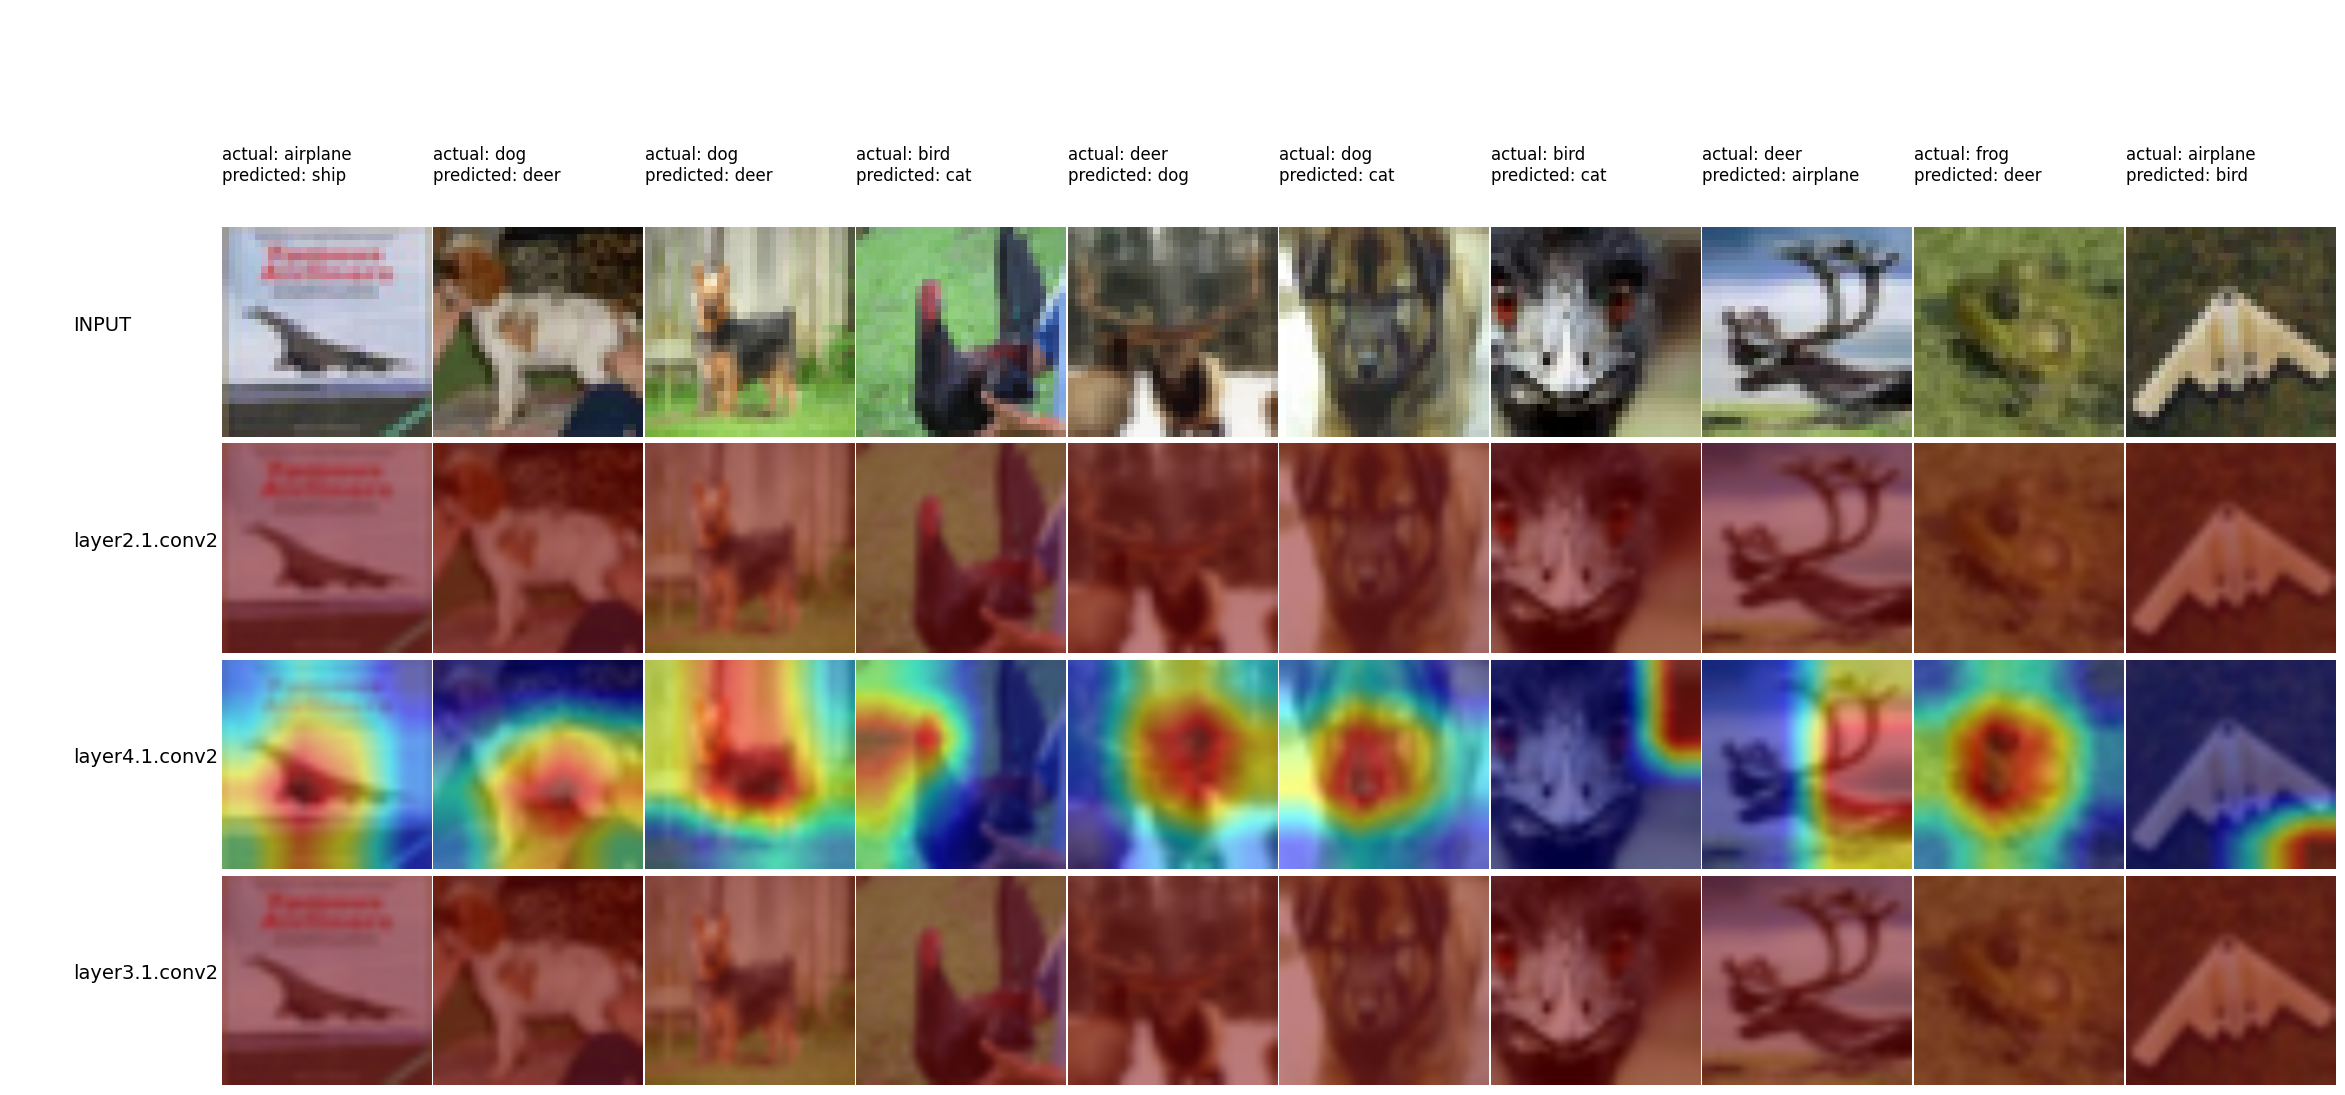

In [29]:
from utils.grad_cam import generate_gradcam, plot_gradcam

target_layers = ["layer2.1.conv2", "layer4.1.conv2", "layer3.1.conv2"]
gradcam_output, probs, predicted_classes = generate_gradcam_images(images_misclassified[:10], model, target_layers, device)
plot_gradcam(gradcam_output, target_layers, labels, (3, 32, 32), predicted_classes, images_misclassified[:10])